2024-10-11 15:12:58.448914: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_688', 8 bytes spill stores, 8 bytes spill loads

2024-10-11 15:12:58.552863: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_688', 32 bytes spill stores, 32 bytes spill loads



Time taken on CPU for 5 epochs: 17.9859 seconds
Time taken on GPU for 5 epochs: 6.4912 seconds
GPU Speedup: 2.77x


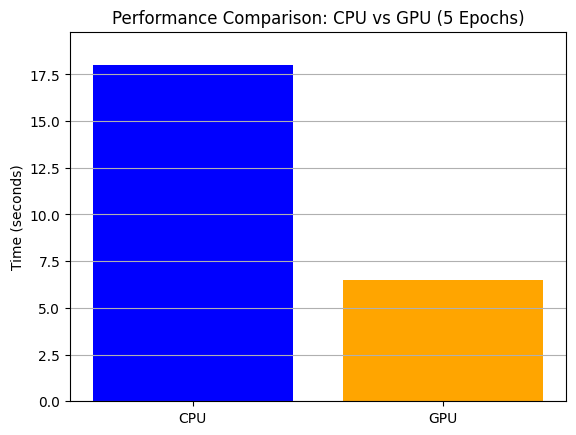

In [3]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# Function to create a more complex model
def create_complex_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),  # Increased units
        tf.keras.layers.Dropout(0.5),  # Added dropout layer for regularization
        tf.keras.layers.Dense(256, activation='relu'),  # Added another layer
        tf.keras.layers.Dense(128, activation='relu'),  # Added another layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Function to generate dummy data
def generate_data(num_samples):
    return (tf.random.normal((num_samples, 28, 28)), tf.random.uniform((num_samples,), maxval=10, dtype=tf.int32))

# Measure performance on CPU
def measure_cpu_performance(epochs):
    with tf.device('/CPU:0'):
        model = create_complex_model()
        x_train, y_train = generate_data(60000)  # Generate 60,000 samples
        start_time = time.time()
        model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
        cpu_time = time.time() - start_time
    return cpu_time

# Measure performance on GPU
def measure_gpu_performance(epochs):
    with tf.device('/GPU:0'):
        model = create_complex_model()
        x_train, y_train = generate_data(60000)  # Generate 60,000 samples
        start_time = time.time()
        model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
        gpu_time = time.time() - start_time
    return gpu_time

# Main function to execute the performance comparison and plot results
if __name__ == '__main__':
    epochs = 5  # Set the number of epochs for training
    cpu_time = measure_cpu_performance(epochs)
    gpu_time = measure_gpu_performance(epochs)

    # Print the results
    print(f'Time taken on CPU for {epochs} epochs: {cpu_time:.4f} seconds')
    print(f'Time taken on GPU for {epochs} epochs: {gpu_time:.4f} seconds')
    print(f'GPU Speedup: {cpu_time / gpu_time:.2f}x')

    # Plotting the results
    devices = ['CPU', 'GPU']
    times = [cpu_time, gpu_time]

    plt.bar(devices, times, color=['blue', 'orange'])
    plt.ylabel('Time (seconds)')
    plt.title(f'Performance Comparison: CPU vs GPU ({epochs} Epochs)')
    plt.ylim(0, max(times) * 1.1)  # Set y-axis limit
    plt.grid(axis='y')

    # Display the plot
    plt.show()
